### SENTIMENT ANALYSIS (SPEECH)- PRIME MINISTER SHRI NARENDRA MODI'S  REPLY TO THE NO CONFIDENCE MOTION

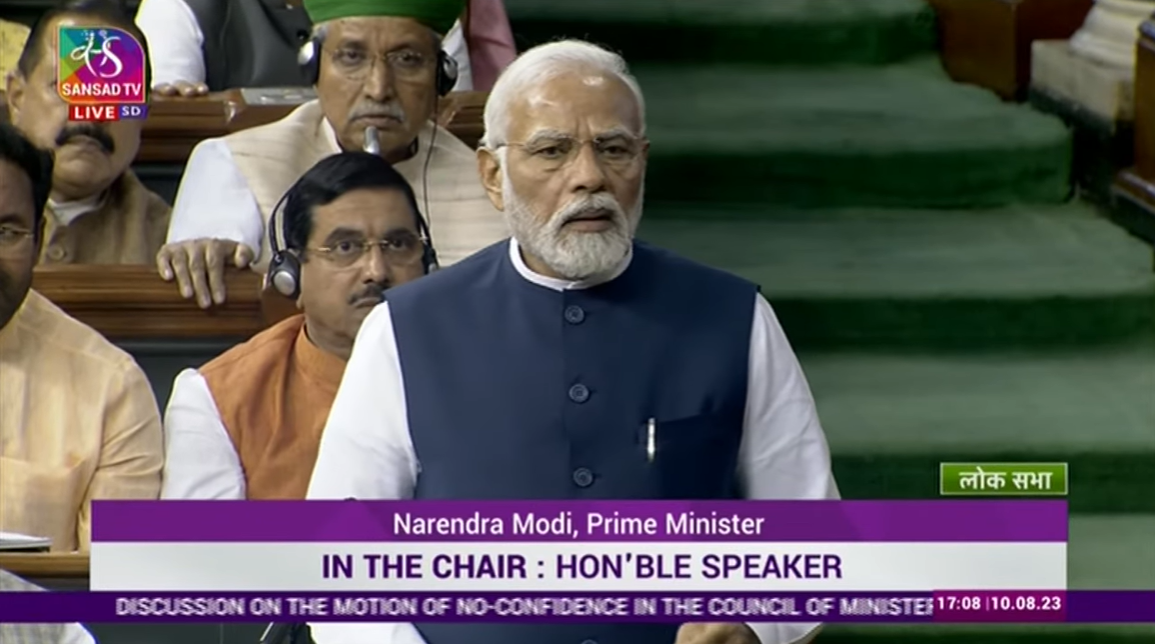

#### Objective
- The objective of this project is to do Sentiment Analysis of the speech given by Prime Minister Shri Narendra Modi on the No Confidence Motion on 10th August 2023.

#### Background
- The No-Confidence motion was brought by Congress MP Shri Gaurav Gogoi.
- The Lok Sabha initiated the no-confidence debate on 8th August 2023 and it was defeated on 10th August 2023 after Prime Minister Shri Narendra Modi's reply.

#### Sentiment Analysis
- Sentiment analysis (opinion mining) is a text mining technique that uses machine learning and natural language processing (nlp) to automatically analyze text for the sentiment of the writer (positive, negative, neutral, and beyond).

#### Project outline
- Importing required libraries & loading the Speech
- Text processing
    - Cleaning data - Lower casing & removal of punctuation marks
    - Tokenization - Breaking sentences into words
    - Stop words removal
    - Lemmatization - For meaningful words
- Classification into Sentiments
- Finding frequency of Sentiment words
- Word Cloud visualization 

#### Import the required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Load the text file

In [2]:
file_path = "speech.txt"
with open(file_path, "r", encoding="utf-8") as file:
    speech = file.read()

In [3]:
speech

'“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”\n\n“Many key legislations did not get the discussion they deserved as the opposition put politics above them”\n\n“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”\n\n“We have given the youth of India a government free of scams”\n\n“Today a trust has arisen in the heart of the poor to fulfill his dreams”\n\n“Opposition is not able to see the trust of people as they are so steeped in distrust”\n\n“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”\n\n“Opposition believes in changing names but they can’t change their work culture”\n\n“Freedom fighters and founding fathers of the country always opposed dynasty politics”\n\n“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [4]:
len(speech)    #Length of speech

18064

#### Text Preprocessing
- Preprocessing input text simply means putting the data into a predictable and analyzable form.

#### 1. Remove Punctuation marks

In [5]:
text_cleaned = re.sub(r'[^\w\s]','',speech) 
text_cleaned

'I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government\n\nMany key legislations did not get the discussion they deserved as the opposition put politics above them\n\nThis time period of the 21st century will impact the country for the next thousand years We all should have a single focus\n\nWe have given the youth of India a government free of scams\n\nToday a trust has arisen in the heart of the poor to fulfill his dreams\n\nOpposition is not able to see the trust of people as they are so steeped in distrust\n\nIn 2028 when you will bring a No Confidence Motion the Country will be among the top 3\n\nOpposition believes in changing names but they cant change their work culture\n\nFreedom fighters and founding fathers of the country always opposed dynasty politics\n\nCrimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty are punished\n\nT

#### 2. Lower Casing

In [6]:
text_cleaned = text_cleaned.lower()  
text_cleaned

'i have come to express immense gratitude towards each and every citizen of india for repeatedly showing their trust in the government\n\nmany key legislations did not get the discussion they deserved as the opposition put politics above them\n\nthis time period of the 21st century will impact the country for the next thousand years we all should have a single focus\n\nwe have given the youth of india a government free of scams\n\ntoday a trust has arisen in the heart of the poor to fulfill his dreams\n\nopposition is not able to see the trust of people as they are so steeped in distrust\n\nin 2028 when you will bring a no confidence motion the country will be among the top 3\n\nopposition believes in changing names but they cant change their work culture\n\nfreedom fighters and founding fathers of the country always opposed dynasty politics\n\ncrimes against women are unacceptable and the central government and the state government will work to ensure that the guilty are punished\n\nt

#### 3. Tokenization
- It is a process in which we split the text into smaller chunks. It basically means we divide paragraphs into sentences, a sentence is divided into phrases or words.

In [7]:
words = word_tokenize(text_cleaned)   
", ".join(words)

'i, have, come, to, express, immense, gratitude, towards, each, and, every, citizen, of, india, for, repeatedly, showing, their, trust, in, the, government, many, key, legislations, did, not, get, the, discussion, they, deserved, as, the, opposition, put, politics, above, them, this, time, period, of, the, 21st, century, will, impact, the, country, for, the, next, thousand, years, we, all, should, have, a, single, focus, we, have, given, the, youth, of, india, a, government, free, of, scams, today, a, trust, has, arisen, in, the, heart, of, the, poor, to, fulfill, his, dreams, opposition, is, not, able, to, see, the, trust, of, people, as, they, are, so, steeped, in, distrust, in, 2028, when, you, will, bring, a, no, confidence, motion, the, country, will, be, among, the, top, 3, opposition, believes, in, changing, names, but, they, cant, change, their, work, culture, freedom, fighters, and, founding, fathers, of, the, country, always, opposed, dynasty, politics, crimes, against, women

#### 4. Remove Stopwords
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [8]:
stop_words = set(stopwords.words('english')) 
word_filtered = [word for word in words if word not in stop_words]  
", ".join(word_filtered)

'come, express, immense, gratitude, towards, every, citizen, india, repeatedly, showing, trust, government, many, key, legislations, get, discussion, deserved, opposition, put, politics, time, period, 21st, century, impact, country, next, thousand, years, single, focus, given, youth, india, government, free, scams, today, trust, arisen, heart, poor, fulfill, dreams, opposition, able, see, trust, people, steeped, distrust, 2028, bring, confidence, motion, country, among, top, 3, opposition, believes, changing, names, cant, change, work, culture, freedom, fighters, founding, fathers, country, always, opposed, dynasty, politics, crimes, women, unacceptable, central, government, state, government, work, ensure, guilty, punished, peace, manipur, march, path, development, assure, people, manipur, mothers, daughters, manipur, nation, stands, house, stands, government, leave, stone, unturned, manipur, gets, back, track, development, government, given, first, priority, development, northeast, u

#### 5. Lemmatization
- The goal of lemmatization is to reduce a word to its root form, also called a lemma. For example, run, runs will get converted into run.

In [9]:
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
", ".join(words_lemmatized)

'come, express, immense, gratitude, towards, every, citizen, india, repeatedly, showing, trust, government, many, key, legislation, get, discussion, deserved, opposition, put, politics, time, period, 21st, century, impact, country, next, thousand, year, single, focus, given, youth, india, government, free, scam, today, trust, arisen, heart, poor, fulfill, dream, opposition, able, see, trust, people, steeped, distrust, 2028, bring, confidence, motion, country, among, top, 3, opposition, belief, changing, name, cant, change, work, culture, freedom, fighter, founding, father, country, always, opposed, dynasty, politics, crime, woman, unacceptable, central, government, state, government, work, ensure, guilty, punished, peace, manipur, march, path, development, assure, people, manipur, mother, daughter, manipur, nation, stand, house, stand, government, leave, stone, unturned, manipur, get, back, track, development, government, given, first, priority, development, northeast, u, sabka, saath,

#### Classify Sentiments

In [10]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,


- If the score is > 0.1 then it can be considered as Positive sentiment word.
- If the score is < -0.1 then it can be considered as Negative sentiment word.
- If the score is between 0.1 & -0.1 then it can be considered as Neutral sentiment word.

In [11]:
print("The length of Sentiment score:",len(sentiment_scores))
print('-----------'*5)
print("The sum of Sentiment score:",sum(sentiment_scores))

The length of Sentiment score: 1602
-------------------------------------------------------
The sum of Sentiment score: 22.906000000000002


In [12]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >=-0.1 and
                sentiment_scores[i] <= 0.1]

In [13]:
print(len(positive_words))
print('-----------'*5)
print(len(negative_words))
print('-----------'*5)
print(len(neutral_words))

138
-------------------------------------------------------
82
-------------------------------------------------------
1382


#### Average Sentiment

In [14]:
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
average_sentiment

0.014298377028714108

In [15]:
print("The average of Sentiment score:",average_sentiment)
print('-----------'*5)
print('The average Sentiment is Neutral')

The average of Sentiment score: 0.014298377028714108
-------------------------------------------------------
The average Sentiment is Neutral


#### List into Positive, Negative & Neutral words

In [16]:
print("The postive words are :", positive_words)

The postive words are : ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'ass

In [17]:
print("The negative words are :", negative_words)

The negative words are : ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [18]:
print("The neutral words are :", neutral_words)

The neutral words are : ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', 

#### Frequency of Sentiment words

In [19]:
postive_frequency = nltk.FreqDist(positive_words)
negative_frequency = nltk.FreqDist(negative_words)
neutral_frequency = nltk.FreqDist(neutral_words)
print("Positive words-:",postive_frequency)
print("Negative words-:",negative_frequency)
print("Neutral words-:",neutral_frequency)

Positive words-: <FreqDist with 74 samples and 138 outcomes>
Negative words-: <FreqDist with 61 samples and 82 outcomes>
Neutral words-: <FreqDist with 658 samples and 1382 outcomes>


In [20]:
df_positive = pd.DataFrame(postive_frequency.most_common(20), columns=['Positive_words','Frequency'])
df_negative = pd.DataFrame(negative_frequency.most_common(20), columns=['Negative_words','Frequency'])
df_neutral = pd.DataFrame(neutral_frequency.most_common(20), columns=['Neutral_words','Frequency'])

#### Exploratory Data Analysis

In [24]:
df = pd.DataFrame(sentiment_scores,columns =['sentiment_scores'])
df['Sentiment'] = df['sentiment_scores'].apply(lambda c : 'Positive' if 
                                               c > 0.1 else ('Negative' if c < -0.1 else 'Neutral'))
Words=word_filtered
df['Words'] = Words
df.head()

sentiment_scores Sentiment      Words
0            0.0000   Neutral       come
1            0.0000   Neutral    express
2            0.0000   Neutral    immense
3            0.5106  Positive  gratitude
4            0.0000   Neutral    towards

In [25]:
fig = px.pie(df, names='Sentiment',  hole=0.4, title='Sentiment distribution',
             color_discrete_sequence=['#4c78a8', '#72b7b2', '#6b92bc'])
fig.show()

fig1= px.histogram(df,x='Sentiment', template='ggplot2',color='Sentiment', title='Sentiment distribution',
                   pattern_shape_sequence = 'x')
fig1.show()

In [26]:
fig = px.histogram(df, x="Words",template='ggplot2',title='Most frequent words')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [27]:
fig = px.bar(df, x='Words', y='Sentiment', color='Sentiment',
             color_discrete_sequence=["red", "blue", "green"],
             title="Sentiment & Words analysis",template='ggplot2')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [28]:
fig = px.line(df, x="sentiment_scores", y="Sentiment", color='Sentiment', 
              title='Sentiment with scores',template='seaborn')
fig.show()

In [29]:
fig = px.scatter(df, x="Sentiment", y="Words", color="Sentiment",template="seaborn", 
                 title='Words & Sentiment analysis')
fig.show()

In [30]:
fig_positive = px.bar(df_positive, x ='Positive_words', y='Frequency', title="Top 20 Positive Sentiment Words",
                      pattern_shape_sequence = 'x',template ='ggplot2')
fig_negative = px.bar(df_negative, x ='Negative_words', y='Frequency', title="Top 20 negative Sentiment Words",
                      pattern_shape_sequence = '+',template ='ggplot2')
fig_neutral = px.bar(df_neutral, x ='Neutral_words', y='Frequency', title="Top 20 neutral Sentiment Words",
                     pattern_shape_sequence = '-',template ='ggplot2')
fig_positive.show()
fig_negative.show()
fig_neutral.show()

#### Visualization

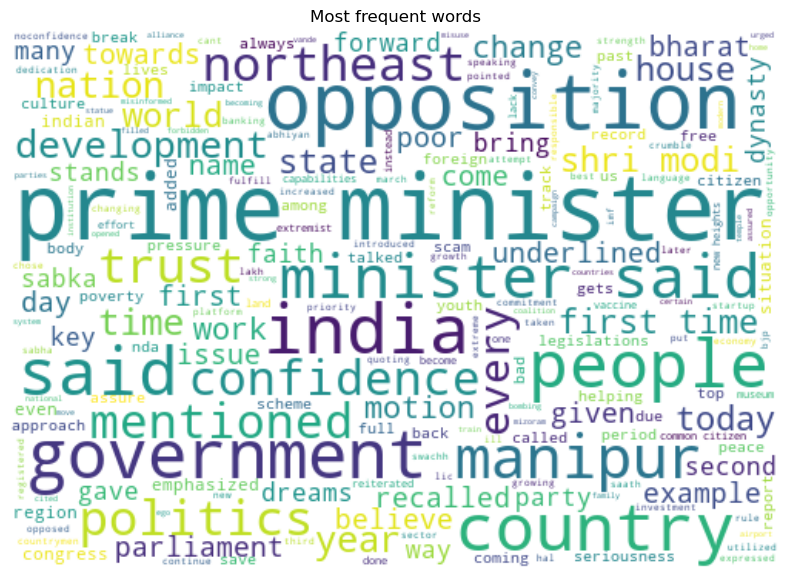

In [31]:
frequent_words = ' '.join([text for text in df['Words']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=350,max_font_size=60,
                      background_color='white',colormap='viridis').generate(frequent_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most frequent words")
plt.axis('off')
plt.show()

In [38]:
wordcloud_postive= WordCloud(width=500,height=300,background_color='white',
                             colormap='summer_r').generate_from_frequencies(postive_frequency)
wordcloud_negative=WordCloud(width=500,height=300, background_color='white',
                             colormap='spring_r').generate_from_frequencies(negative_frequency)
wordcloud_neutral=WordCloud(width=500, height=300, background_color='white',
                            colormap='winter_r').generate_from_frequencies(neutral_frequency)

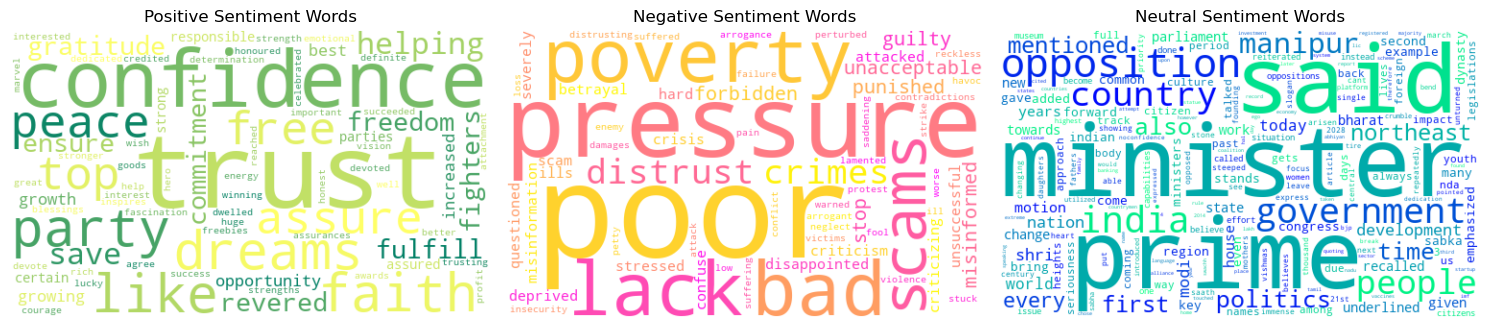

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(wordcloud_postive, interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")
plt.tight_layout()
plt.show()

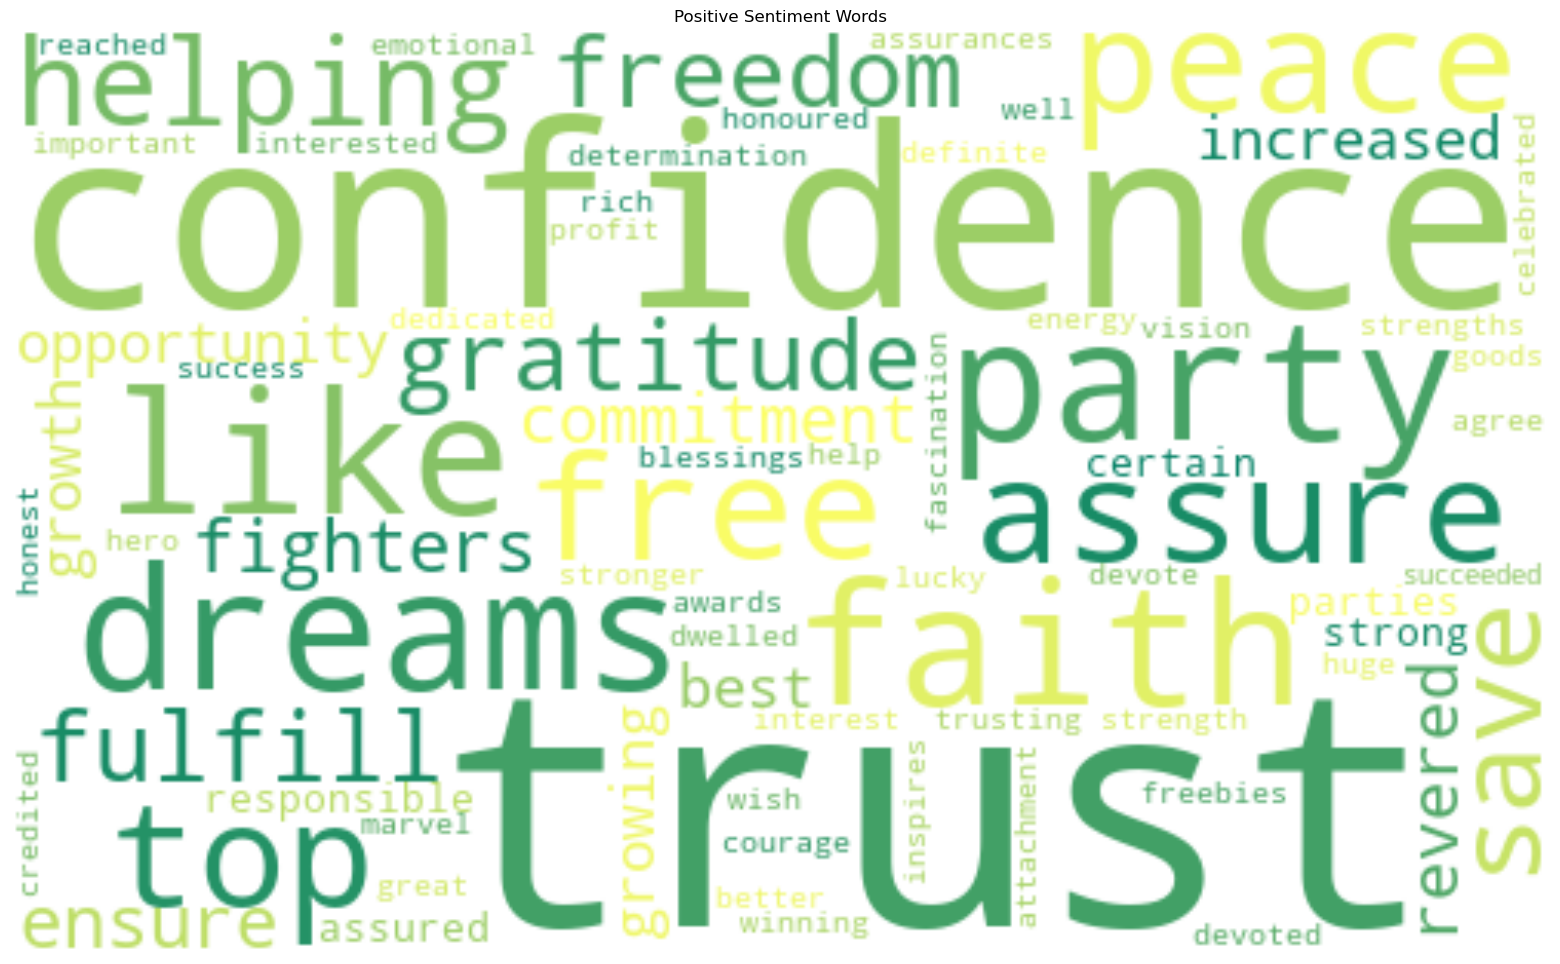

In [34]:
plt.figure(figsize=(20,12))

plt.imshow(wordcloud_postive, interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")
plt.show()

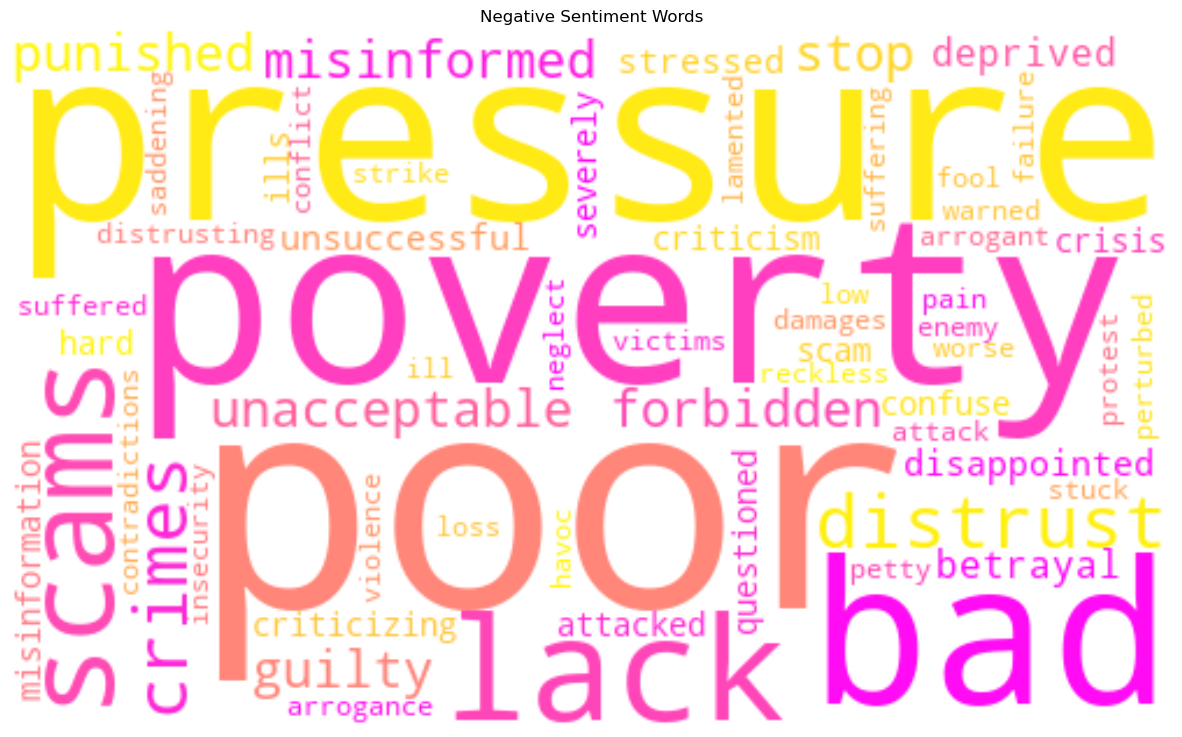

In [35]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")
plt.show()

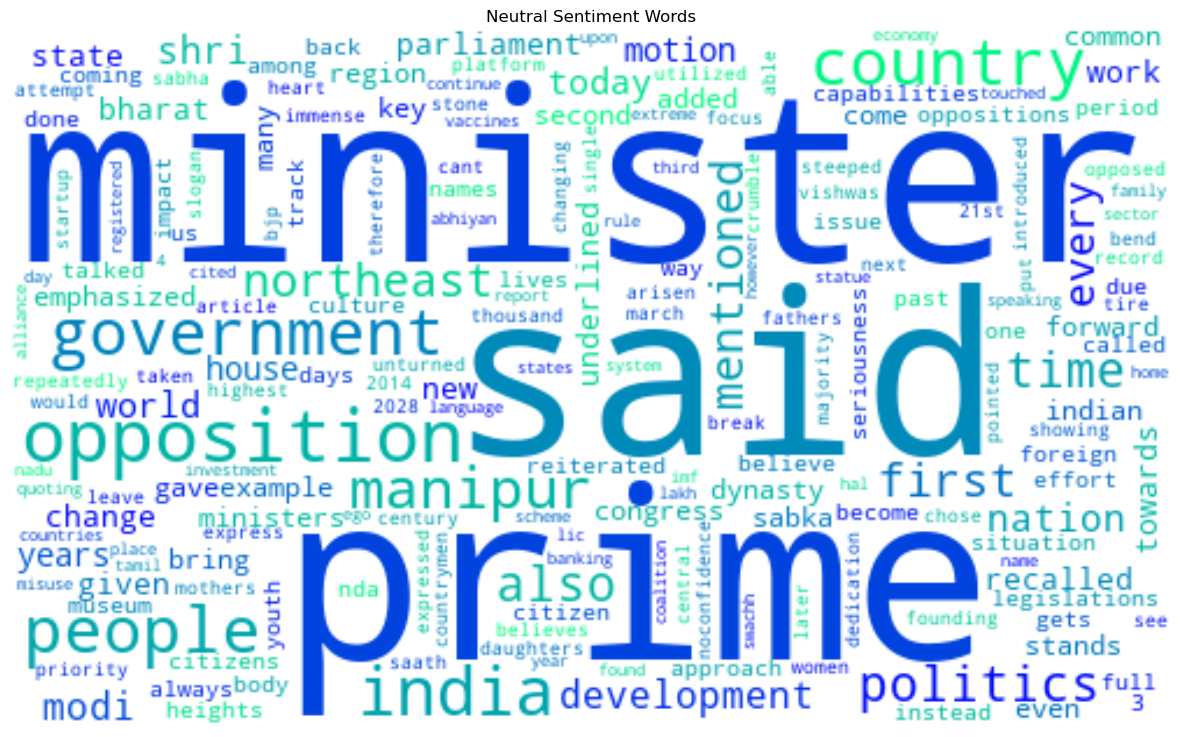

In [36]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")
plt.show()

#### Conclusion
- The objective of this project was to do Sentiment Analysis and to categorize text under Positive, Negative & Neutral.
- From the analysis, we established that the total number of Positive sentiment words were 138, Negative sentiment words were 82 & Neutral sentiment words were 1382.
- The average of Sentiment score is 0.014 thus making the average sentiment as Neutral.

-----------------------------------------------------------------------------------------------------------------------------